# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** MUHAMMAD RAFI ILHAM
- **Email:** mrafilham83@gmail.com
- **ID Dicoding:** rafilham

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berdasarkan Ketgori Produk, Produk apa yang paling banyak dan juga paling sedikit terjual?
- Pertanyaan 2: Bagaimana laju performa dari penjualan platform E-Commerce?
- Pertanyaan 3: Berdasarkan pelayanan yang diberikan e-commerce, Bagaimana distibusi penilaian atau *rating* yang diberikan oleh customer?
- Pertanyaan 4: Bagaimana distribusi pelanggan berdasarkan segmentasi RFM?
- Pertanyaan 5: Bagaimana profil demografis customer kami, dan apakah ada perbedaan preferensi pembelian di antara mereka?
- Pertanyaan 6 : Dimana letak geografis yang memiliki customer terbanyak?

## Import Semua Packages/Library yang Digunakan

In [119]:
%pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [172]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [173]:
%pip install branca


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
import unidecode
import matplotlib.image as mpimg

In [ ]:
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [2]:
#Load customers tabel
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
#Load geolocation tabel
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [6]:
#Load order_items tabel
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [10]:
#Load order_payments tabel
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head(20)

order_id  payment_sequential payment_type  \
0   b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1   a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2   25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3   ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4   42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
5   298fcdf1f73eb413e4d26d01b25bc1cd                   1  credit_card   
6   771ee386b001f06208a7419e4fc1bbd7                   1  credit_card   
7   3d7239c394a212faae122962df514ac7                   1  credit_card   
8   1f78449c87a54faf9e96e88ba1491fa9                   1  credit_card   
9   0573b5e23cbd798006520e1d5b4c6714                   1       boleto   
10  d88e0d5fa41661ce03cf6cf336527646                   1  credit_card   
11  2480f727e869fdeb397244a21b721b67                   1  credit_card   
12  616105c9352a9668c38303ad44e056cd                   1  credit_card   
13  cf95215a722f3ebf29e6bbab87a29e61                   1  credit_card   
14  769214176682788a92801d8907fa1b40                   1  credit_card   
15  12e5cfe0e4716b59afb0e0f4a3bd6570                   1  credit_card   
16  61059985a6fc0ad64e95d9944caacdad                   1  credit_card   
17  79da3f5fe31ad1e454f06f95dc032ad5                   1  credit_card   
18  8ac09207f415d55acff302df7d6a895c                   1  credit_card   
19  b2349a3f20dfbeef62e7b31baa22f84b                   1  credit_card   

    payment_installments  payment_value  
0                      8          99.33  
1                      1          24.39  
2                      1          65.71  
3                      8         107.78  
4                      2         128.45  
5                      2          96.12  
6                      1          81.16  
7                      3          51.84  
8                      6         341.09  
9                      1          51.95  
10                     8         188.73  
11                     1         141.90  
12                     1          75.78  
13                     5         102.66  
14                     4         105.28  
15                    10         157.45  
16                     1         132.04  
17                     1          98.94  
18                     4         244.15  
19                     3         136.71

In [11]:
#Load order_reviews tabel
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head(10)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5  15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6  07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7  7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8  a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
9  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   
5             1                  NaN   
6             5                  NaN   
7             5                  NaN   
8             5                  NaN   
9             4            recomendo   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
5                                                NaN  2018-04-13 00:00:00   
6                                                NaN  2017-07-16 00:00:00   
7                                                NaN  2018-08-14 00:00:00   
8                                                NaN  2017-05-17 00:00:00   
9  aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53  
5     2018-04-16 00:39:37  
6     2017-07-18 19:30:34  
7     2018-08-14 21:36:06  
8     2017-05-18 12:05:37  
9     2018-05-23 16:45:47

In [12]:
#Load orders tabel
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
8  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
9  e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
5    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
6     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
7    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   
8    delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   
9    delivered      2017-07-29 11:55:02  2017-07-29 12:05:32   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   
5          2017-07-11 14:58:04           2017-07-26 10:57:55   
6                          NaN                           NaN   
7          2017-05-22 10:07:46           2017-05-26 12:55:51   
8          2017-01-26 14:16:31           2017-02-02 14:08:10   
9          2017-08-10 19:45:24           2017-08-16 17:14:30   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00  
5           2017-08-01 00:00:00  
6           2017-05-09 00:00:00  
7           2017-06-07 00:00:00  
8           2017-03-06 00:00:00  
9           2017-08-23 00:00:00

In [13]:
#Load product_category_name_translation tabel
product_category_name_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [14]:
#Load products tabel
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [15]:
#Load sellers tabel
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Assessing Data

1. Menilai Data customers_df

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


tidak seperti pada latihan, bisa kita liat bahwa setiap kolom memiliki data yang sama semua (kemungkinan tidak ada missing value)

In [17]:
#Checking data if any missing value
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

data customers_df tidak memiliki missing value

In [18]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
customers_df.describe()

customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

In [20]:
customers_df.describe(include="all")

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

2. Menilai Data geolocation_df

In [21]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


data kedua masih terlihat tidak adanya data yang kosong atau salah tipe data

In [22]:
#Checking data if any missing value
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

data tidak memiliki missing value

In [23]:
#Checking if any duplicated data
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


dari data geolocation_df kita bisa menemukan adanya duplikasi pada data sebanyak 261831

In [24]:
geolocation_df.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

dari pengecekan secara ringkas dengan parameter statistik menggunakan describe tidak ditemukan keanehan pada data geolocation_df

In [25]:
geolocation_df.describe(include="all")

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

3. Menilai order_items

In [26]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


terdapat kesalahan tipe data pada kolom shipping_limit_date, seharusnya menggunakan datetime

In [27]:
#Checking data if any missing value
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

dari data order_items_df tidak memiliki missing value

In [28]:
#Checking if any duplicated data
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat data yang terduplikasi

In [29]:
order_items_df.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

tidak memiliki keanehan pada hasil describe diatas

In [30]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2017-07-21 18:25:23            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000

4. Menilai order_payments

In [31]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Dari data diatas tidak terdapat tipe data yang salah dan dari jumlah per kolom nya sama semua

In [32]:
#Checking data if any missing value
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

tidak terdapat missing value pada order_payments_df

In [33]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


dari data diatas tidak terdapat duplikasi data

In [34]:
order_payments_df.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [35]:
order_payments_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

dari data diatas tidak adanya keanehan dengan menggunakan method describe()

5. Menilai order_reviews

In [36]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terlihat ada beberapa kolom yang tidak memiliki jumlah data yang seharusnya ini mungkin terdapat missing values dan juga terdapat kesalahan tipe data pada kolom **review_creation_date** serta **review_answer_timestamp** seharusnya menggunakan datetime

In [37]:
#Checking data if any missing value
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

bisa dilihat bahwa pada data order_reviews terdapat missing value pada kolom review_comment_title sebanyak 87.656 dan review_comment_message sebanyak 58.247

In [38]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data pada order_reviews

In [39]:
order_reviews_df.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

In [40]:
order_reviews_df.describe(include="all")

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

tidak ada keanehan berdasarkan parameter parameter diatas dengan method describe()

6. Menilai orders_df

In [41]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat ketidaksamaan jumlah data pada beberapa kolom, kemungkinan terdapat missing value, dan juga terdapat kesalahan tipe data pada kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date** 

In [42]:
#Checking data if any missing value
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat missing value pada data diatas di kolom kolom **order_approved_at** sebanyak **160**, **order_delivered_carrier_date** sebanyak **1783** dan **order_delivered_customer_date** sebanyak **2965** tetapi ini dapat disebabkan karena terdapat perbedaan pada order_status.

In [43]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


dari data diatas tidak terdapat duplikasi data

In [44]:
orders_df.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

In [45]:
orders_df.describe(include="all")

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

tidak terdapat keanehan pada data yang ditampilkan menggunakan method describe()

7. Menilai product_category

In [46]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


tidak terdapat kesalahan tipe data pada kolom kolom di data diatas

In [47]:
#Checking data if any missing value
product_category_name_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

data diatas tidak memiliki missing value

In [48]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


data diatas tidak memiliki duplikasi data

In [49]:
product_category_name_df.describe()

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

In [50]:
product_category_name_df.describe(include="all")

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

dari data diatas tidak memiliki keanehan dengan menggunakan method describe() untuk mengecek nya

8. Menilai products_df

In [51]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


dari data diatas tidak terdapat tipe data yang salah tetapi terlihat seperti ada missing value

In [52]:
#Checking data if any missing value
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

terdapat missing value di hampir semua kolom yang ada pada data diatas

In [53]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


data diatas tidak terdapat duplikasi data

In [54]:
products_df.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [55]:
products_df.describe(include="all")

product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476949                  771.495285            2.188986   
std               10.245741                  635.115225            1.736766   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32949.000000       32949.000000       32949.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.472488          30.815078          16.937661   
std          4282.038731          16.914458          13.637554   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32949.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.196728  
std            12.079047  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

dari data diatas tidak terdapat keanehan yang bisa ditemukan

9. Menilai sellers_df

In [56]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


dari data diatas tidak terdapat jumlah data dan tipe data yang salah

In [57]:
#Checking data if any missing value
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

tidak terdapat missing value pada data

In [58]:
#Checking if any duplicated data
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi data pada data diatas

In [59]:
sellers_df.describe()

seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

In [60]:
sellers_df.describe(include="all")

seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

dari data diatas tidak ditemukan keanehan menggunakan method describe()

### Cleaning Data

**DATA DUPLIKAT**

Berdasarkan hasil pencarian duplicate data, data yang memiliki penduplikasian data terdapat atau ditemukan pada geolocation_dataset.csv, tetapi dikarenakan pada kolom **geolocation_city** dan **geolocation_state** value tertingginya yaitu Sao Paulo maka tidak perlu dilakukan drop

**MISSING VALUE**

Menangani Missing Value **review_comment_title** dan juga **review_comment_message**

In [61]:
order_reviews_df[order_reviews_df.review_comment_title.isnull()]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[87656 rows x 7 columns]

In [62]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [63]:
order_reviews_df[order_reviews_df.review_comment_message.isnull()]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
5      15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6      07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
...                                 ...                               ...   
99217  c6b270c61f67c9f7cb07d84ea8aeaf8b  48f7ee67313eda32bfcf5b9c1dd9522d   
99218  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score review_comment_title review_comment_message  \
0                 4                  NaN                    NaN   
1                 5                  NaN                    NaN   
2                 5                  NaN                    NaN   
5                 1                  NaN                    NaN   
6                 5                  NaN                    NaN   
...             ...                  ...                    ...   
99217             5                  NaN                    NaN   
99218             5                  NaN                    NaN   
99219             5                  NaN                    NaN   
99220             5                  NaN                    NaN   
99222             4                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
0      2018-01-18 00:00:00     2018-01-18 21:46:59  
1      2018-03-10 00:00:00     2018-03-11 03:05:13  
2      2018-02-17 00:00:00     2018-02-18 14:36:24  
5      2018-04-13 00:00:00     2018-04-16 00:39:37  
6      2017-07-16 00:00:00     2017-07-18 19:30:34  
...                    ...                     ...  
99217  2017-12-13 00:00:00     2017-12-14 11:09:36  
99218  2018-04-27 00:00:00     2018-04-30 01:18:57  
99219  2018-07-07 00:00:00     2018-07-14 17:18:30  
99220  2017-12-09 00:00:00     2017-12-11 20:06:42  
99222  2018-07-01 00:00:00     2018-07-02 12:59:13  

[58247 rows x 7 columns]

In [64]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

Kita bisa missing value pada data diatas dengan "No Title dan No Review Message Saja" saja menggunakan method fillna(), sebenarnya ini tidak terlalu berpengaruh karena kita tidak ingin menganalisis sentimen berdasarkan komen itu, kita hanya membutuhkan review score nya saja

In [65]:
order_reviews_df['review_comment_title'].fillna("No Title", inplace=True)

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\357239842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna("No Title", inplace=True)


In [66]:
order_reviews_df['review_comment_message'].fillna("No Review Message", inplace=True)

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\4125879981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_message'].fillna("No Review Message", inplace=True)


Mengecek kembalik order_reviews

In [67]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [68]:
order_reviews_df[order_reviews_df['review_comment_title'] == "No Title"].head(10)

review_id                          order_id  \
0   7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1   80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2   228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5   15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6   07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7   7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8   a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
10  c9cfd2d5ab5911836ababae136c3a10c  cdf9aa68e72324eeb25c7de974696ee2   

    review_score review_comment_title  \
0              4             No Title   
1              5             No Title   
2              5             No Title   
3              5             No Title   
4              5             No Title   
5              1             No Title   
6              5             No Title   
7              5             No Title   
8              5             No Title   
10             5             No Title   

                               review_comment_message review_creation_date  \
0                                   No Review Message  2018-01-18 00:00:00   
1                                   No Review Message  2018-03-10 00:00:00   
2                                   No Review Message  2018-02-17 00:00:00   
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
5                                   No Review Message  2018-04-13 00:00:00   
6                                   No Review Message  2017-07-16 00:00:00   
7                                   No Review Message  2018-08-14 00:00:00   
8                                   No Review Message  2017-05-17 00:00:00   
10                                  No Review Message  2017-12-23 00:00:00   

   review_answer_timestamp  
0      2018-01-18 21:46:59  
1      2018-03-11 03:05:13  
2      2018-02-18 14:36:24  
3      2017-04-21 22:02:06  
4      2018-03-02 10:26:53  
5      2018-04-16 00:39:37  
6      2017-07-18 19:30:34  
7      2018-08-14 21:36:06  
8      2017-05-18 12:05:37  
10     2017-12-26 14:36:03

**TIPE DATA**

Mengganti tipe data ke date time pada kolom shipping_limit_date pada order_items_df

In [70]:
datetime_order_items = ["shipping_limit_date"]

for column in datetime_order_items:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Mengecek kembalik data

In [71]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Mengganti tipe data ke date time pada kolom review_creation_date pada order_reviews_df dan review_answer_timestamp pada order_reviews_df

In [72]:
datetime_order_reviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_order_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Mengecek kembali data

In [73]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Mengganti tipe data ke date time pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date pada orders_df

In [74]:
datetime_orders = [
  "order_purchase_timestamp",
  "order_approved_at",
  "order_delivered_carrier_date",
  "order_delivered_customer_date",
  "order_estimated_delivery_date"
]

for column in datetime_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

Mengecek kembali data

In [75]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

**MENCOBA MELIHAT JUMLAH CUSTOMER TERBANYAK BY CITY DAN STATE**

In [76]:
customers_df.describe(include="all")

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

In [78]:
customers_df.sample(10)

customer_id                customer_unique_id  \
38483  c9ecc0e06e2ac8485acc3a539d0ae727  990bdb18726e889e74b7bb975c831c83   
85407  7726c0f6652be3a189429a41a156e66a  52d309747878947b1781fc69fdd6c984   
25592  a72e35b6d5f7bf2c3ab65d04d9b4f61b  a3f7e1a9311dac0970c1bb2dd47c9a2b   
61111  8b5e899f6beae4402997de27e382c736  237d192179ac3e151816e0b06183eb17   
99194  1b6d9168534fafc4d2bab71ae7641bc9  4c0dc4c1650460e296cf9e51ea06c993   
82998  9abc3d571a784146d4f60c6a45ca1cee  bce11bb3c53f9d7c5d4196a88e27937a   
45041  55a18ae004af33e2dcfe7a956b30eafa  f2bb0ec797f6958a1f82722c2e94fd4b   
21549  aa6d4b904d1e9b9970f456a37f304ee2  0f9e7383f6b801ea203d16604c8df58a   
57794  56be20830570df2c36d2935be6f1e417  04eac1171d6846c64e71bf03b3e4174e   
75059  0feb4570bb79ad1d9418a224faa1d93f  2c009bef0f63cb98b2067ad0ada95319   

       customer_zip_code_prefix           customer_city customer_state  
38483                     30315          belo horizonte             MG  
85407                     35300               caratinga             MG  
25592                     75388                trindade             GO  
61111                     17505                 marilia             SP  
99194                     47850  luis eduardo magalhaes             BA  
82998                     36830            espera feliz             MG  
45041                      9341                    maua             SP  
21549                     47690                  coribe             BA  
57794                     65062                sao luis             MA  
75059                     13940        aguas de lindoia             SP

In [79]:
customers_city = customers_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_city.head(10)

customer_city  customer_unique_id
0              sao paulo               14984
1         rio de janeiro                6620
2         belo horizonte                2672
3               brasilia                2069
4               curitiba                1465
5               campinas                1398
6           porto alegre                1326
7               salvador                1209
8              guarulhos                1153
9  sao bernardo do campo                 908

bisa dilihat sao paulo merupakan kota yang memiliki jumlah customers paling banyak

In [80]:
customers_states = customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customers_states.head(10)

customer_state  customer_unique_id
0             SP               40302
1             RJ               12384
2             MG               11259
3             RS                5277
4             PR                4882
5             SC                3534
6             BA                3277
7             DF                2075
8             ES                1964
9             GO                1952

bisa kita ketahui bahwa customers terbanyak berada pada state SP

**MENCOBA MELIHAT JENIS ATAU TIPE PAYMENT TERBANYAK ATAU TERPOPULER**

In [81]:
order_payments_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

In [82]:
order_payments_df.sample(10)

order_id  payment_sequential payment_type  \
16990  31a200fac55455bb8b28d747b21cfb83                   1  credit_card   
46888  9c2cd65f37fcbe73d562581e5d53577b                   1  credit_card   
13203  3a4e65de6ffd941f6a4ee824d472aabb                   1  credit_card   
6832   f3ac96719aada8e7d197ff55ddea4d12                   2  credit_card   
95448  00bd8cf08fa3998ea6ad6d16c2165822                   1  credit_card   
12847  6f2ae8728d4663eecab7315f623ac889                   1  credit_card   
77760  8ab73774d1bf1ccd52e66b86ccb40ea1                   1  credit_card   
44495  0cae0419c5938004fa8b8dba302552d1                   1       boleto   
44299  b82b1a7017f4c904921dd5c6c6da8804                   1  credit_card   
60441  3acfefca1b7d510f944c782689681753                   1  credit_card   

       payment_installments  payment_value  
16990                     1          89.58  
46888                     6          70.72  
13203                     1         276.74  
6832                      2          48.65  
95448                     1          34.28  
12847                     7          76.19  
77760                     1          75.16  
44495                     1          61.05  
44299                     1         232.65  
60441                     6         313.93

In [83]:
payment_type_list = order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
payment_type_list.head(10)

payment_type  order_id
0  credit_card     76505
1       boleto     19784
2      voucher      3866
3   debit_card      1528
4  not_defined         3

tipe pembayaran yang paling banyak digunakan atau paling populer terletak pada credit card

**MENCOBA MELIHAT/ MENGETAHUI WAKTU PENGIRIMAN TIAP ORDER**

In [84]:
orders_df.sample(5)

order_id                       customer_id  \
5016   f26b1f9ec4fda52abb40f124457b79c4  25e96ea17049e5c6afc22e3e400aae8e   
17801  a9f3eefeba2b707e39dfc81dea76cb3a  4dbd23fc431225ba2ef01b343523afe6   
49297  b30e55fe9fd40e07925199c964a7ef3f  1f3ba3284cbf9d2d47bfa7fde6b54c93   
75485  a8c7e8c088aabc1cd41eb0161f0c7757  9fe82e319a983fcac6e5ea245687ea71   
69986  97826eac2ea69cbcffac7c3358a19138  b164311fb207ff095a8aec678688c763   

      order_status order_purchase_timestamp   order_approved_at  \
5016     delivered      2018-02-16 20:01:32 2018-02-16 20:10:27   
17801    delivered      2018-05-09 13:51:53 2018-05-10 11:36:37   
49297    delivered      2017-12-29 14:00:03 2017-12-29 14:07:26   
75485    delivered      2017-09-07 20:55:17 2017-09-07 21:10:12   
69986    delivered      2017-10-21 20:19:39 2017-10-21 20:35:23   

      order_delivered_carrier_date order_delivered_customer_date  \
5016           2018-02-21 21:09:17           2018-02-28 23:32:57   
17801          2018-05-10 12:03:00           2018-05-25 14:37:25   
49297          2018-01-03 18:23:34           2018-01-04 20:22:35   
75485          2017-09-08 14:32:26           2017-09-17 16:49:10   
69986          2017-10-25 22:47:49           2017-11-06 19:55:46   

      order_estimated_delivery_date  
5016                     2018-03-09  
17801                    2018-06-05  
49297                    2018-01-18  
75485                    2017-09-27  
69986                    2017-11-29

In [85]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [86]:
orders_df.sample(5)

order_id                       customer_id  \
26255  60f62691c52a18ebeccd7cb2539d6c63  67a37fb3a64e54057411563e843c21e7   
27908  ecf7b1bde783b7b3efeba24af4156fc9  7141a1789cfd3c693be52ad893f9d91c   
1681   b3443b9956f438b73ca1d434c1d209d4  50a6b9bf2be166cbccc5b039176833bb   
66358  083b812dd46ddf24d9ae0b6429139c9f  a5babc0d525097dca3f22398b2edfd2d   
79819  aa6fe4963f1ceff46626f56e08564bdb  7611c3b8e884af2035406accca147b09   

      order_status order_purchase_timestamp   order_approved_at  \
26255    delivered      2017-11-08 19:34:10 2017-11-08 19:47:12   
27908    delivered      2017-04-16 12:35:30 2017-04-16 13:05:23   
1681     delivered      2018-02-15 08:13:47 2018-02-16 08:07:35   
66358    delivered      2018-07-13 07:47:48 2018-07-13 08:04:06   
79819    delivered      2018-03-19 15:24:25 2018-03-19 15:49:57   

      order_delivered_carrier_date order_delivered_customer_date  \
26255          2017-11-10 10:21:56           2017-11-22 01:07:27   
27908          2017-04-17 14:28:13           2017-04-27 09:18:06   
1681           2018-02-17 01:33:25           2018-02-20 19:38:56   
66358          2018-07-19 10:40:00           2018-07-24 21:55:43   
79819          2018-03-21 15:51:55           2018-04-03 21:34:50   

      order_estimated_delivery_date  delivery_time  
26255                    2017-12-01           12.0  
27908                    2017-05-10           10.0  
1681                     2018-03-02            4.0  
66358                    2018-07-31            5.0  
79819                    2018-04-20           13.0

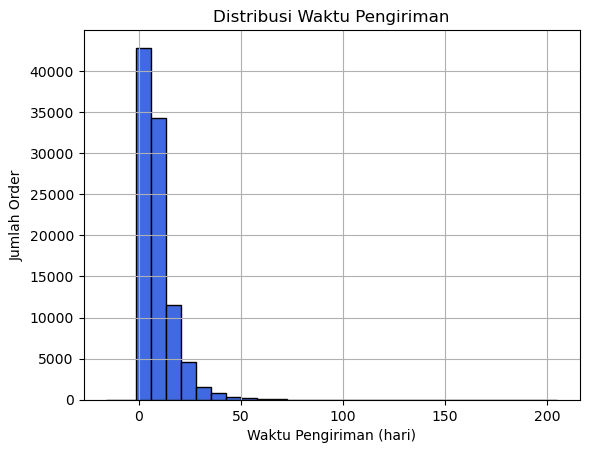

In [92]:
orders_df.delivery_time.hist(bins=30, color="royalblue", edgecolor="black")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Jumlah Order")
plt.title("Distribusi Waktu Pengiriman")
plt.show()

bisa dilihat terdapat kolom baru yaitu delivery_time yang memuat waktu pengiriman tiap order dalam satuah hari (dibagi 86400)

**MENCOBA MELIHAT CUSTOMER YANG ACTIVE DAN NON ACTIVE**

In [93]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

customer_id                customer_unique_id  \
68789  16ed990d94eef3d79216c2ff23124700  ad2bbf8d4d2af0537f9f5ff6f3ad8192   
44558  95487d0934f136c2742457652f607d7f  e6d4f499586a90c752c6a3402f3c0fb7   
47850  98b50f67673f8ca597407241c37b8d1f  3791233090cbbeefbc0518859472bd2d   
63165  e67f669e175f3572055f89dfb87d7c8d  67e747b902c2d5c2e5a266b00d965145   
7619   4e513a51bf088b776864a966b91fd79c  d33e6be4d4330badbc3d7adf96059e1d   

       customer_zip_code_prefix        customer_city customer_state  status  
68789                     12216  sao jose dos campos             SP  Active  
44558                      2281            sao paulo             SP  Active  
47850                     82920             curitiba             PR  Active  
63165                     86160             porecatu             PR  Active  
7619                      31910       belo horizonte             MG  Active

In [94]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL PRODUCTS DAN PRODUCTS CATEGORY**

In [95]:
products_merge_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_merge_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

In [113]:
top_product_categories = (
    products_merge_df
    .groupby("product_category_name", as_index=False)
    .agg(total_products=("product_id", "nunique"))
    .sort_values(by="total_products", ascending=False)
)

top_product_categories.head(10)

product_category_name  total_products
13         cama_mesa_banho            3029
32           esporte_lazer            2867
54        moveis_decoracao            2657
11            beleza_saude            2444
72   utilidades_domesticas            2335
8               automotivo            1900
44  informatica_acessorios            1639
12              brinquedos            1411
66      relogios_presentes            1329
70               telefonia            1134

In [114]:
top_product_categories = (
    products_merge_df
    .groupby("product_category_name_english", as_index=False)
    .agg(total_products=("product_id", "nunique"))
    .sort_values(by="total_products", ascending=False)
)

top_product_categories.head(10)


product_category_name_english  total_products
7                 bed_bath_table            3029
65                sports_leisure            2867
39               furniture_decor            2657
43                 health_beauty            2444
49                    housewares            2335
5                           auto            1900
15         computers_accessories            1639
69                          toys            1411
70                 watches_gifts            1329
68                     telephony            1134

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL ORDER_PAYMENTS DAN ORDER_REVIEWS**

In [97]:
order_payments_reviews_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payments_reviews_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   

   payment_installments  payment_value                         review_id  \
0                     8          99.33  4ce650e117a5b292bf5ea980a61eb61e   
1                     1          24.39  ad2036caca61484fc435d7e673c020f2   
2                     1          65.71  bcddfa0f7d2e54cfc74bae4f01b84d92   
3                     8         107.78  c37a0e51e5df82bdb55d38ff0ffb6af3   
4                     8         107.78  5bc7680443b4ef765fec11a8201eeb0c   

   review_score review_comment_title  \
0           1.0        Não recomendo   
1           5.0             No Title   
2           5.0             No Title   
3           5.0             No Title   
4           5.0             No Title   

                              review_comment_message review_creation_date  \
0  Produto com qualidade ruim, amassado e descasc...           2018-05-10   
1                                  No Review Message           2018-06-30   
2                                           Aprovada           2017-12-19   
3                                  No Review Message           2017-12-21   
4                                  No Review Message           2017-12-21   

  review_answer_timestamp  
0     2018-05-15 23:38:00  
1     2018-07-03 11:23:16  
2     2017-12-22 17:55:30  
3     2017-12-21 21:42:31  
4     2017-12-22 01:10:39

In [102]:
order_payments_reviews_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [105]:
order_payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL CUSTOMERS DAN ORDERS**

In [99]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  \
0 2017-05-16 15:22:12          2017-05-23 10:47:57   
1 2018-01-12 20:58:32          2018-01-15 17:14:59   
2 2018-05-20 16:19:10          2018-06-11 14:31:00   
3 2018-03-13 17:29:19          2018-03-27 23:22:42   
4 2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  delivery_time  
0           2017-05-25 10:35:35                    2017-06-05            2.0  
1           2018-01-29 12:41:19                    2018-02-06           14.0  
2           2018-06-14 17:58:51                    2018-06-13            3.0  
3           2018-03-28 16:04:25                    2018-04-10            1.0  
4           2018-08-09 20:55:48                    2018-08-15           10.0

In [108]:
orders_per_city = (
    cust_orders_df
    .groupby("customer_city", as_index=False)
    .agg(total_orders=("order_id", "nunique"))
    .sort_values(by="total_orders", ascending=False)
)

orders_per_city.head(10)


customer_city  total_orders
3597              sao paulo         15540
3155         rio de janeiro          6882
453          belo horizonte          2773
558                brasilia          2131
1143               curitiba          1521
707                campinas          1444
2964           porto alegre          1379
3247               salvador          1245
1529              guarulhos          1189
3428  sao bernardo do campo           938

In [109]:
orders_state = (
    cust_orders_df
    .groupby("customer_state", as_index=False)
    .agg(total_orders=("order_id", "nunique"))
    .sort_values(by="total_orders", ascending=False)
)

orders_state.head(10)


customer_state  total_orders
25             SP         41746
18             RJ         12852
10             MG         11635
22             RS          5466
17             PR          5045
23             SC          3637
4              BA          3380
6              DF          2140
7              ES          2033
8              GO          2020

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL CUSTS_ORDERS DAN ORDERS_PAYMENTS_REVIEWS**

In [110]:
customers_new_df = pd.merge(
    left=cust_orders_df,
    right=order_payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_new_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at  ... payment_sequential payment_type  \
0 2017-05-16 15:22:12  ...                1.0  credit_card   
1 2018-01-12 20:58:32  ...                1.0  credit_card   
2 2018-05-20 16:19:10  ...                1.0  credit_card   
3 2018-03-13 17:29:19  ...                1.0  credit_card   
4 2018-07-29 10:10:09  ...                1.0  credit_card   

  payment_installments  payment_value                         review_id  \
0                  2.0         146.87  88b8b52d46df026a9d1ad2136a59b30b   
1                  8.0         335.48  02fc48a9efa3e3d0f1a8ea26507eeec3   
2                  7.0         157.73  5ad6695d76ee186dc473c42706984d87   
3                  1.0         173.30  059a801bb31f6aab2266e672cab87bc5   
4                  8.0         252.25  8490879d58d6c5d7773f2739a03f089a   

  review_score  review_comment_title  \
0          4.0              No Title   
1          5.0              No Title   
2          5.0              No Title   
3          5.0              No Title   
4          5.0         a melhor nota   

                          review_comment_message review_creation_date  \
0                              No Review Message           2017-05-26   
1                              No Review Message           2018-01-30   
2                              No Review Message           2018-06-15   
3                              No Review Message           2018-03-29   
4  O baratheon è esxelente Amo adoro o baratheon           2018-08-10   

   review_answer_timestamp  
0      2017-05-30 22:34:40  
1      2018-02-10 22:43:29  
2      2018-06-15 12:10:59  
3      2018-04-02 18:36:47  
4      2018-08-17 01:59:52  

[5 rows x 24 columns]

**MELAKUKAN JOINING ATAU MENGGABUNGKAN ORDER_ITEMS DAN SELLERS**

In [111]:
order_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_items_sellers_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  seller_zip_code_prefix  \
0 2017-09-19 09:45:35   58.90          13.29                   27277   
1 2017-05-03 11:05:13  239.90          19.93                    3471   
2 2018-01-18 14:48:30  199.00          17.87                   37564   
3 2018-08-15 10:10:18   12.99          12.79                   14403   
4 2017-02-13 13:57:51  199.90          18.14                   87900   

     seller_city seller_state  
0  volta redonda           SP  
1      sao paulo           SP  
2  borda da mata           MG  
3         franca           SP  
4         loanda           PR

In [112]:
sellers_per_city = (
    order_items_sellers_df
    .groupby("seller_city", as_index=False)
    .agg(total_sellers=("seller_id", "nunique"))
    .sort_values(by="total_sellers", ascending=False)
)

sellers_per_city.head(10)

seller_city  total_sellers
517       sao paulo            694
159        curitiba            127
450  rio de janeiro             96
64   belo horizonte             68
442  ribeirao preto             52
220       guarulhos             50
227        ibitinga             49
483     santo andre             45
101        campinas             41
325         maringa             40

**MELAKUKAN JOINING ATAU MENGGABUNGKAN TABEL PRODUCTS_MERGE DAN ORDER_ITEMS_SELLERS**

In [115]:
sellers_new_df = pd.merge(
    left=products_merge_df,
    right=order_items_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_new_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english                          order_id  \
0                     perfumery  e17e4f88e31525f7deef66779844ddce   
1                           art  5236307716393b7114b53ee991f36956   
2                sports_leisure  01f66e58769f84129811d43eefd187fb   
3                          baby  143d00a4f2dde4e0364ee1821577adb3   
4                    housewares  86cafb8794cb99a9b1b77fc8e48fbbbb   

   order_item_id                         seller_id shipping_limit_date  \
0              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-04-30 17:33:54   
1              1  b561927807645834b59ef0d16ba55a24 2018-02-06 19:11:15   
2              1  7b07b3c7487f0ea825fc6df75abd658b 2018-07-11 21:30:20   
3              1  c510bc1718f0f2961eaa42a23330681a 2018-08-07 09:10:13   
4              1  0be8ff43f22e456b4e0371b2245e4d01 2018-04-17 01:30:23   

    price  freight_value  seller_zip_code_prefix seller_city seller_state  
0   10.91           7.39                    3694   sao paulo           SP  
1  248.00          17.99                    2955   sao paulo           SP  
2   79.80           7.82                    2016   sao paulo           SP  
3  112.30           9.54                   13330  indaiatuba           SP  
4   37.90           8.29                    4461   sao paulo           SP

In [116]:
sellers_new_df.sort_values(by="price", ascending=False)

product_id              product_category_name  \
20528  489ae2aa008f021502940f251d4cce7f              utilidades_domesticas   
73922  69c590f7ffc7bf8db97190b6cb6ed62e                                pcs   
49503  1bdf5e6731585cf01aa8169c7028d6ad                              artes   
71835  a6492cc69376c469ab6f61d8f44de961                    eletroportateis   
32232  c3ed642d592594bb648ff4a04cee2747                    eletroportateis   
...                                 ...                                ...   
55911  05b515fdc76e888aada3c6d66c201dff                       beleza_saude   
55903  05b515fdc76e888aada3c6d66c201dff                       beleza_saude   
29610  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   
29608  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   
29609  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   

       product_name_lenght  product_description_lenght  product_photos_qty  \
20528                 31.0                       875.0                 2.0   
73922                 50.0                      1935.0                 4.0   
49503                 28.0                      3954.0                 2.0   
71835                 41.0                      1780.0                 2.0   
32232                 59.0                      2217.0                 2.0   
...                    ...                         ...                 ...   
55911                 45.0                       231.0                 3.0   
55903                 45.0                       231.0                 3.0   
29610                 25.0                      1041.0                 5.0   
29608                 25.0                      1041.0                 5.0   
29609                 25.0                      1041.0                 5.0   

       product_weight_g  product_length_cm  product_height_cm  \
20528           30000.0               60.0               61.0   
73922            5660.0               54.0               18.0   
49503            7400.0               47.0               25.0   
71835           22600.0               55.0               40.0   
32232           30000.0               50.0               49.0   
...                 ...                ...                ...   
55911             800.0               21.0                4.0   
55903             800.0               21.0                4.0   
29610             200.0               16.0                4.0   
29608             200.0               16.0                4.0   
29609             200.0               16.0                4.0   

       product_width_cm    product_category_name_english  \
20528              33.0                       housewares   
73922              47.0                        computers   
49503              25.0                              art   
71835              40.0                 small_appliances   
32232              50.0                 small_appliances   
...                 ...                              ...   
55911              15.0                    health_beauty   
55903              15.0                    health_beauty   
29610              11.0  construction_tools_construction   
29608              11.0  construction_tools_construction   
29609              11.0  construction_tools_construction   

                               order_id  order_item_id  \
20528  0812eb902a67711a1cb742b3cdaa65ae              1   
73922  fefacc66af859508bf1a7934eab1e97f              1   
49503  f5136e38d1a14a4dbd87dff67da82701              1   
71835  a96610ab360d42a2e5335a3998b4718a              1   
32232  199af31afc78c699f0dbf71fb178d4d4              1   
...                                 ...            ...   
55911  8272b63d03f5f79c56e9e4120aec44ef             11   
55903  8272b63d03f5f79c56e9e4120aec44ef              3   
29610  c5bdd8ef3c0ec420232e668302179113              2   
29608  3ee6513ae7ea23bdfab5b9ab60bffcb5              1   
29609  6e864b3f

In [117]:
sellers_new_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

## Explore geolocation

In [118]:
geolocation_df.sample(10)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
34243                          2612       -23.471281       -46.665018   
863218                        83402       -25.345091       -49.222488   
374688                        17630       -21.772951       -50.462043   
738232                        59575        -5.702702       -35.290650   
117206                         5047       -23.526477       -46.699960   
589917                        35368       -20.471877       -42.485098   
730255                        58038        -7.105646       -34.836221   
394490                        18700       -23.107606       -48.923323   
2470                           1150       -23.533850       -46.655805   
302940                        13360       -22.995278       -47.496781   

       geolocation_city geolocation_state  
34243         sao paulo                SP  
863218          colombo                PR  
374688        arco-iris                SP  
738232         extremoz                RN  
117206        sao paulo                SP  
589917         sericita                MG  
730255      joao pessoa                PB  
394490            avare                SP  
2470          sao paulo                SP  
302940         capivari                SP

In [121]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [122]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string)

In [123]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [124]:
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 24220].head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                        24220       -22.905817       -43.106989   
470811                        24220       -22.902306       -43.112545   
470812                        24220       -22.904567       -43.110491   
470820                        24220       -22.902575       -43.109192   
470821                        24220       -22.907500       -43.106170   

       geolocation_city geolocation_state  
470805          niteroi                RJ  
470811          niteroi                RJ  
470812          niteroi                RJ  
470820          niteroi                RJ  
470821          niteroi                RJ

## EXPLORE ALL DATA

**MELAKUKAN JOINING ATAU MENGGABUNGKAN SEMUA TABEL**

In [125]:
all_df = pd.merge(
    left=customers_new_df,
    right=sellers_new_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  status  \
0                     14409                 franca             SP  Active   
1                      9790  sao bernardo do campo             SP  Active   
2                      1151              sao paulo             SP  Active   
3                      8775        mogi das cruzes             SP  Active   
4                     13056               campinas             SP  Active   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at  ... product_width_cm product_category_name_english  \
0 2017-05-16 15:22:12  ...             31.0              office_furniture   
1 2018-01-12 20:58:32  ...             40.0                    housewares   
2 2018-05-20 16:19:10  ...             17.0              office_furniture   
3 2018-03-13 17:29:19  ...             28.0              office_furniture   
4 2018-07-29 10:10:09  ...             35.0                  home_confort   

  order_item_id                         seller_id  shipping_limit_date  \
0           1.0  7c67e1448b00f6e969d365cea6b010ab  2017-05-22 15:22:12   
1           1.0  b8bc237ba3788b23da09c0f1f3a3288c  2018-01-18 20:58:32   
2           1.0  7c67e1448b00f6e969d365cea6b010ab  2018-06-05 16:19:10   
3           1.0  7c67e1448b00f6e969d365cea6b010ab  2018-03-27 16:31:16   
4           1.0  4a3ca9315b744ce9f8e9374361493884  2018-07-31 10:10:09   

    price  freight_value  seller_zip_code_prefix      seller_city  \
0  124.99          21.88                  8577.0  itaquaquecetuba   
1  289.00          46.48                 88303.0           itajai   
2  139.94          17.79                  8577.0  itaquaquecetuba   
3  149.94          23.36                  8577.0  itaquaquecetuba   
4  230.00          22.25                 14940.0         ibitinga   

   seller_state  
0            SP  
1            SC  
2            SP  
3            SP  
4            SP  

[5 rows x 42 columns]

In [126]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

**MELIHAT JUMLAH PENJUAL YANG PALING POPULER DI KOTA DAN STATE**

In [127]:
sellers_cities = all_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_cities.head(10)

seller_city  seller_id
0       sao paulo        694
1        curitiba        127
2  rio de janeiro         96
3  belo horizonte         68
4  ribeirao preto         52
5       guarulhos         50
6        ibitinga         49
7     santo andre         45
8        campinas         41
9         maringa         40

kota yang paling banyak penjual nya yaitu sao paulo

In [128]:
sellers_states = all_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
sellers_states.head(10)

seller_state  seller_id
0           SP       1849
1           PR        349
2           MG        244
3           SC        190
4           RJ        171
5           RS        129
6           GO         40
7           DF         30
8           ES         23
9           BA         19

kota yang paling banyak penjual nya yaitu SP

In [130]:
all_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

order_id  payment_value
customer_state                         
SP                 41746     7726078.35
RJ                 12852     2795615.67
MG                 11635     2351221.09
RS                  5466     1160175.66
PR                  5045     1079795.49
BA                  3380      805070.98
SC                  3637      801276.45
GO                  2020      520481.65
DF                  2140      438095.32
ES                  2033      408611.64
PE                  1652      380294.18
CE                  1336      349290.36
PA                   975      263217.70
MT                   907      257802.26
MA                   747      200363.24
PB                   536      181660.73
MS                   715      167670.27
PI                   495      137158.89
RN                   485      117192.91
AL                   413      112296.47
SE                   350       90651.44
TO                   280       72412.08
RO                   253       69184.48
AM                   148       34956.93
AC                    81       24984.86
AP                    68       21642.70
RR                    46       12462.21

**Membuat file baru hasil merge all data**

In [131]:
all_df.to_csv("data/all_data.csv", index=False)

## RFM Analysis

In [132]:
reference_date = all_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [133]:
# Hitung RFM Metrics untuk setiap customer_unique_id
rfm_df = all_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency (seberapa baru transaksi terakhir)
    'order_id': 'count',  # Frequency (jumlah transaksi)
    'price': 'sum'  # Monetary (total belanja)
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
})

- Recency: Berapa hari sejak pelanggan terakhir kali melakukan transaksi.
- Frequency: Berapa kali pelanggan telah bertransaksi.
- Monetary: Total uang yang telah dibelanjakan oleh pelanggan.

In [139]:
# Konversi nilai Recency, Frequency, dan Monetary menjadi skor 1-5
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Hitung total RFM Score
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']

In [140]:
# Segmentasi pelanggan berdasarkan RFM Score
def segment_customer(rfm_score):
    if rfm_score >= 12:
        return 'Best Customer'
    elif 9 <= rfm_score < 12:
        return 'Loyal Customer'
    elif 7 <= rfm_score < 9:
        return 'Potential Loyalist'
    elif 5 <= rfm_score < 7:
        return 'At Risk'
    else:
        return 'Lost Customer'

rfm_df['Customer_Segment'] = rfm_df['RFM_Score'].apply(segment_customer)

# Lihat distribusi segmen pelanggan
print(rfm_df['Customer_Segment'].value_counts())

Customer_Segment
Loyal Customer        37643
Potential Loyalist    24819
Best Customer         16860
At Risk               13198
Lost Customer          3576
Name: count, dtype: int64


- Best Customers (Skor RFM tertinggi)
- Loyal Customers
- At Risk Customers (Pelanggan yang mulai jarang belanja)
- Lost Customers (Pelanggan yang hampir tidak pernah belanja lagi)

- Pelanggan dengan skor tinggi (misalnya RFM_Score ≥ 12) adalah Best Customers.
- Skor sedang (antara 7-11) menunjukkan pelanggan reguler.
- Skor rendah (≤ 6) bisa masuk kategori Lost Customers.

Didapat bahwa RFM Score menujukkan beberapa segmen dari pengelompokkan pelanggan sebagai berikut: 
- Best Customers: 16.860 pelanggan
- Loyal Customers: 37.643 pelanggan
- Potential Loyalists: 24.819 pelanggan
- At Risk Customers: 13.198 pelanggan
- Lost Customers: 3.576 pelanggan

In [141]:
rfm_df['RFM_Score'].value_counts()

RFM_Score
9     13822
8     13324
10    12769
7     11495
11    11052
6      8137
12     7693
5      5061
13     4963
14     2855
4      2635
15     1349
3       941
Name: count, dtype: int64

In [142]:
rfm_df['Customer_Segment'].value_counts().sum(), all_df['customer_unique_id'].nunique()

(96096, 96096)

In [137]:
rfm_df.head()

Recency  Frequency  Monetary  R_Score  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      161          1    129.90        4   
0000b849f77a49e4a4ce2b2a4ca5be3f      164          1     18.90        4   
0000f46a3911fa3c0805444483337064      586          1     69.00        1   
0000f6ccb0745a6a4b88665a16c9f078      370          1     25.99        2   
0004aac84e0df4da2b147fca70cf8255      337          1    180.00        2   

                                  F_Score  M_Score  RFM_Score Customer_Segment  
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2        1        1          6          At Risk  
0000b849f77a49e4a4ce2b2a4ca5be3f        1        1          6          At Risk  
0000f46a3911fa3c0805444483337064        1        1          3    Lost Customer  
0000f6ccb0745a6a4b88665a16c9f078        1        1          4    Lost Customer  
0004aac84e0df4da2b147fca70cf8255        1        1          4    Lost Customer

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan Kategori Produk, Produk apa yang paling banyak dan juga paling sedikit terjual?

In [144]:
products_summary = all_df.groupby("product_category_name_english")["product_id"].count().reset_index()
products_summary = products_summary.rename(columns={"product_id": "products_count"})
products_summary = products_summary.sort_values(by="products_count", ascending=False)

products_summary.head(10)

product_category_name_english  products_count
7                 bed_bath_table           11988
43                 health_beauty           10032
65                sports_leisure            9004
39               furniture_decor            8832
15         computers_accessories            8150
49                    housewares            7380
70                 watches_gifts            6213
68                     telephony            4726
42                  garden_tools            4590
5                           auto            4400

bisa dilihat product dengan jumlah jual terbanyak terdapat pada product bernama bed_bath_table

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\1594618531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products_count", y="product_category_name_english",
C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\1594618531.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products_count", y="product_category_name_english",


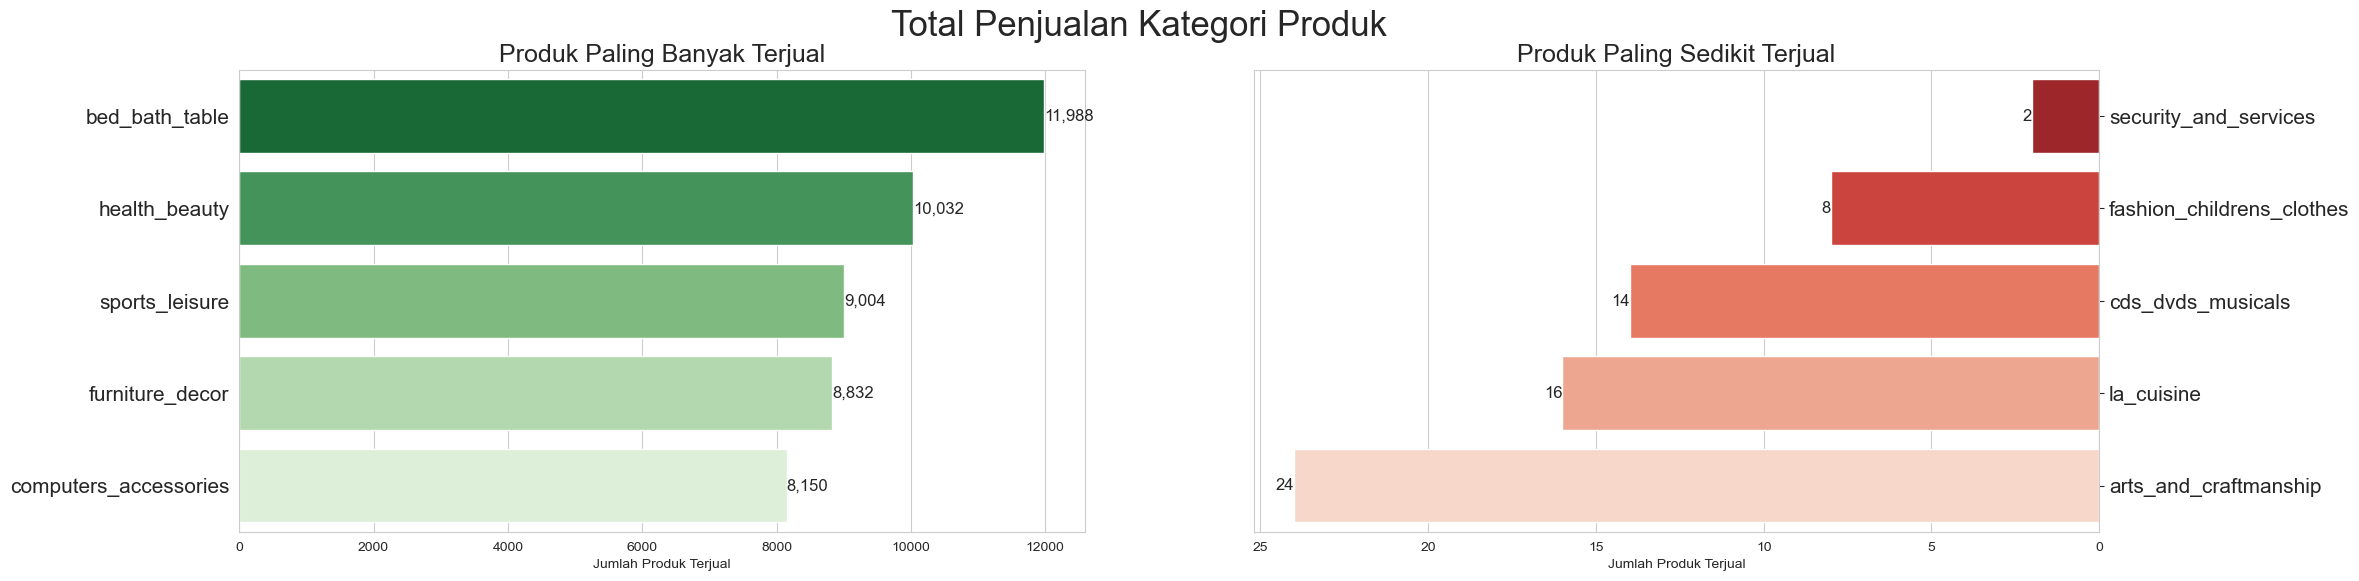

In [146]:
# Membuat palet warna dengan gradasi untuk dua grafik
top_colors = sns.color_palette("Greens_r", 5)  # Warna hijau dengan gradasi dari gelap ke terang
bottom_colors = sns.color_palette("Reds_r", 5) # Warna merah dengan gradasi dari gelap ke terang

# Membuat plot dengan dua barplot (produk paling banyak & paling sedikit terjual)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Barplot untuk produk paling banyak terjual
sns.barplot(x="products_count", y="product_category_name_english", 
            data=products_summary.head(5), palette=top_colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jumlah Produk Terjual")
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Menambahkan angka di atas bar (produk paling banyak terjual)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=12)

# Barplot untuk produk paling sedikit terjual
sns.barplot(x="products_count", y="product_category_name_english", 
            data=products_summary.sort_values(by="products_count", ascending=True).head(5), 
            palette=bottom_colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jumlah Produk Terjual")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Menambahkan angka di atas bar (produk paling sedikit terjual)
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='right', va='center', fontsize=12)

# Menambahkan judul utama
plt.suptitle("Total Penjualan Kategori Produk", fontsize=25)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana laju performa dari penjualan platform E-Commerce?

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

In [148]:
monthly_orders_df.head()

order_approved_at  order_count
0         September            1
1           October          320
2          November            0
3          December            1
4           January          760

In [149]:
monthly_orders_df = monthly_orders_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [150]:
monthly_orders_df.sort_values(by='order_count', ascending=False)

order_approved_at  order_count
14          November         7395
18             March         7288
16           January         7187
20               May         7066
19             April         6778
17          February         6706
23            August         6620
22              July         6176
21              June         6164
15          December         5832
13           October         4590
12         September         4301

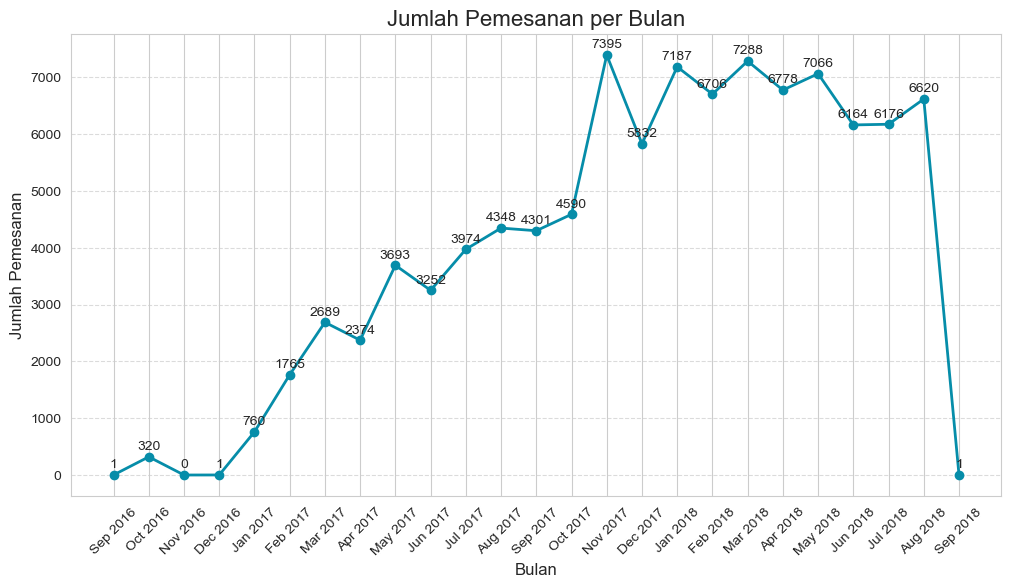

In [152]:
# Menambahkan kolom nama bulan dengan format lengkap (Misalnya: "Jan 2018", "Feb 2018")
monthly_orders_df['month_year'] = monthly_orders_df['order_approved_at'].dt.strftime('%b %Y')

# Mengurutkan berdasarkan waktu
monthly_orders_df = monthly_orders_df.sort_values('order_approved_at')

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders_df["month_year"], 
    monthly_orders_df["order_id"], 
    marker='o', 
    linewidth=2, 
    color="#068DA9"
)

# Menambahkan label jumlah pesanan di setiap titik
for i, txt in enumerate(monthly_orders_df["order_id"]):
    plt.annotate(txt, (monthly_orders_df["month_year"][i], monthly_orders_df["order_id"][i]), 
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=10)

# Pengaturan grafik
plt.title("Jumlah Pemesanan per Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pemesanan", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()

bisa dilihat dari performa grafik jumlah order dari tahun ke tahun diatas, dimulai dari bulan september 2016 hingga september 2018, Mengalami p **kenaikan** pada awal tahun 2017 **signifikan** hingga bulan maret lalu mengalami sedikit **penurunan** setelahnya. Mendekati akhir tahun 2017 performa penjualan mengalami **kenaikan** yang cukup signifikan dimulai dari bulan november, tetapi langsung mengalami **penurunan** kurang lebih 1500 order. Masuk pada tahun 2018 jumlah order mengalami **kenaikan** lagi dan lumayan cukup stabil di angka 6000 hingga 7000an, sampai dipertengahan tahun merosok jauh sekali ke 1

### Pertanyaan 3: Berdasarkan pelayanan yang diberikan e-commerce, Bagaimana distibusi penilaian atau *rating* yang diberikan oleh customer?

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\1655883141.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


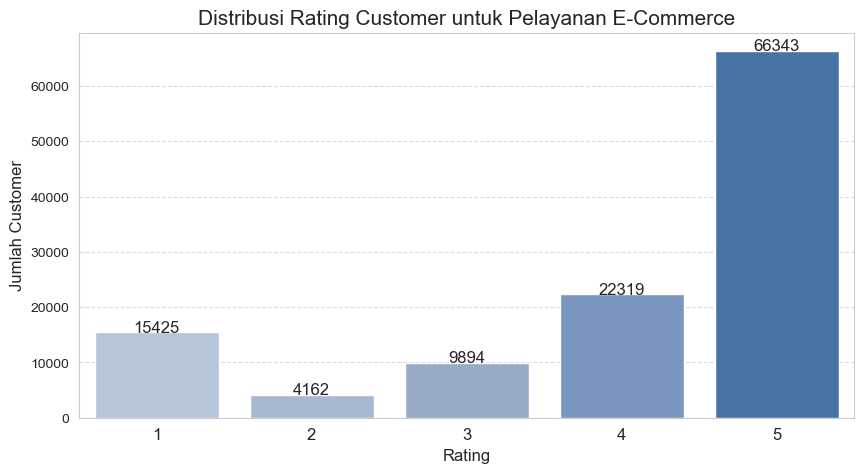

In [154]:
# Menghitung jumlah setiap rating (1-5)
review_scores = all_df['review_score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Menemukan rating dengan jumlah tertinggi
max_count = review_scores.max()
top_ratings = review_scores[review_scores == max_count].index.tolist()

# Gradasi warna: semakin tinggi rating, semakin kuat warnanya
colors = ["#B0C4DE", "#A0B6D8", "#8FA9D1", "#6E94C9", "#3A71B4"]  # Dari abu-abu muda ke biru tua

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_scores.index, 
    y=review_scores.values, 
    order=[1, 2, 3, 4, 5],  
    palette=colors
)

# Tambahkan label jumlah di atas setiap bar
for i, v in enumerate(review_scores.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

# Pengaturan grafik
plt.title("Distribusi Rating Customer untuk Pelayanan E-Commerce", fontsize=15)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()


Sebanyak 66.343 customer memberikan rating 5, yang menunjukkan bahwa mayoritas customer merasa puas dengan pelayanan E-Commerce ini.

Namun, dengan mempertimbangkan rating di bawah 5, masih terdapat sejumlah customer yang memberikan penilaian lebih rendah. Hal ini dapat mengindikasikan adanya aspek pelayanan yang masih perlu diperbaiki.

### Pertanyaan 4: Bagaimana distribusi pelanggan berdasarkan segmentasi RFM?

In [161]:
print(rfm_df['Customer_Segment'].value_counts())

Customer_Segment
Loyal Customer        37643
Potential Loyalist    24819
Best Customer         16860
At Risk               13198
Lost Customer          3576
Name: count, dtype: int64


C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\638885235.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


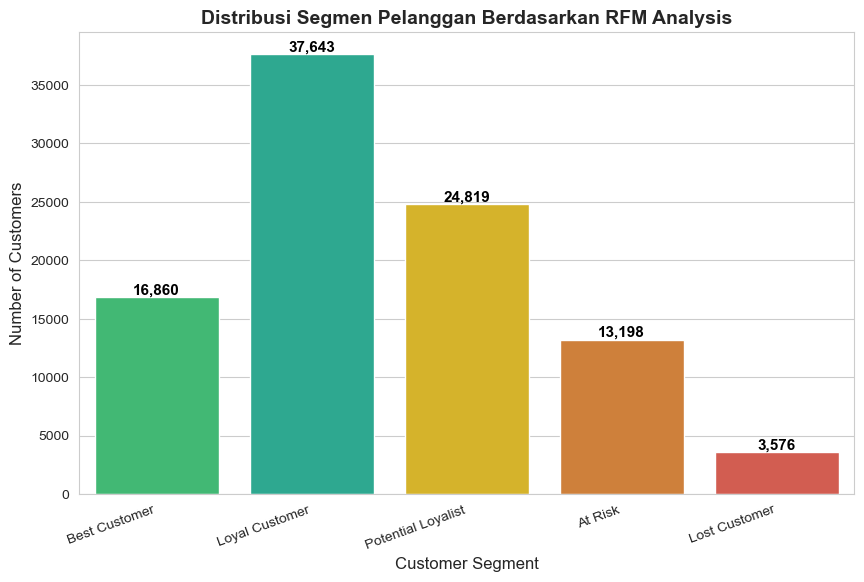

In [160]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Urutan kategori yang sesuai dengan logika bisnis
order = ['Best Customer', 'Loyal Customer', 'Potential Loyalist', 'At Risk', 'Lost Customer']

# Palet warna yang mencerminkan status pelanggan (hijau ke merah)
colors = ["#2ECC71", "#1ABC9C", "#F1C40F", "#E67E22", "#E74C3C"]

# Membuat bar chart dengan urutan yang benar
ax = sns.barplot(
    x=rfm_df['Customer_Segment'].value_counts()[order].index,
    y=rfm_df['Customer_Segment'].value_counts()[order].values,
    palette=colors
)

# Menambahkan label
plt.title("Distribusi Segmen Pelanggan Berdasarkan RFM Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Customer Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=20, ha="right")

# Menampilkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.show()

Berdasarkan hasil analisis RFM:

- Best Customers (16.860 pelanggan) adalah pelanggan dengan skor RFM tertinggi, sering berbelanja, dan memiliki total belanja yang besar. Mereka adalah pelanggan paling berharga bagi bisnis.
- Loyal Customers (37.643 pelanggan) adalah pelanggan yang sering berbelanja tetapi mungkin tidak sebesar Best Customers dalam hal total belanja. Mereka tetap penting karena memiliki keterikatan dengan bisnis.
- Potential Loyalists (24.819 pelanggan) adalah pelanggan yang memiliki potensi menjadi pelanggan setia tetapi mungkin belum bertransaksi sebanyak Loyal Customers.
- At Risk Customers (13.198 pelanggan) adalah pelanggan yang mulai jarang berbelanja. Jika tidak ditindaklanjuti dengan strategi retensi, mereka bisa menjadi pelanggan yang hilang.
- Lost Customers (3.576 pelanggan) adalah pelanggan yang sudah sangat jarang atau tidak bertransaksi lagi dalam jangka waktu lama.


Secara keseluruhan, analisis ini membantu mengidentifikasi pelanggan yang perlu dipertahankan serta strategi yang dapat diterapkan untuk meningkatkan loyalitas pelanggan.

### Pertanyaan 5: Bagaimana profil demografis customer E-Commerce ini? Apakah ada perbedaan preferensi pembelian di antara mereka?

In [162]:
byState_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
byState_df.rename(columns={"customer_id": "customer_count"}, inplace=True)
byState_df.head()

customer_state  customer_count
0             AC              81
1             AL             413
2             AM             148
3             AP              68
4             BA            3380

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\206641986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_state', y='customer_count', data=byState_df, palette="Blues_r")


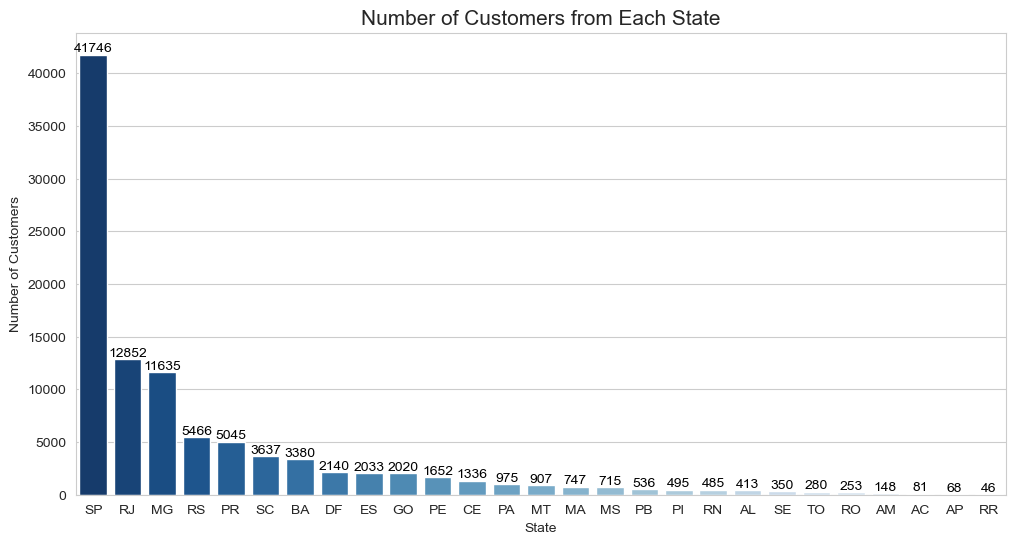

In [166]:
# Visualisasi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_state', y='customer_count', data=byState_df, palette="Blues_r")

# Menambahkan angka di setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Customers from Each State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=10)
plt.show()

C:\Users\Tings\AppData\Local\Temp\ipykernel_48176\1639376354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='customer_city', y='customer_count', data=byCity_df, palette="Oranges_r")


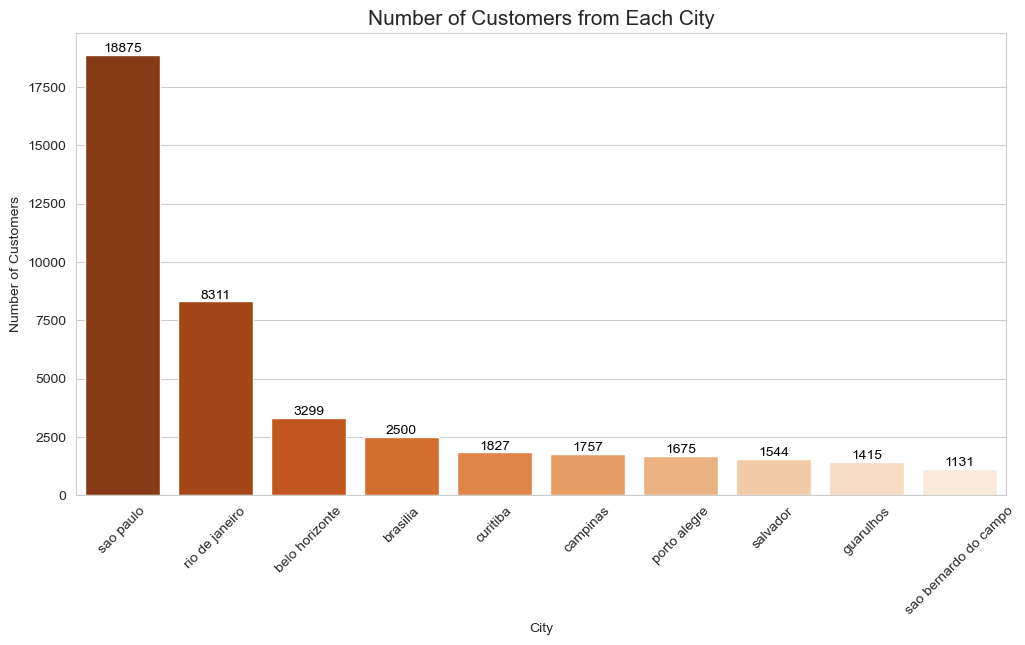

In [181]:
# Menghitung jumlah customer per city
byCity_df = all_df['customer_city'].value_counts().head(10).reset_index()
byCity_df.columns = ['customer_city', 'customer_count']

# Menentukan kota dengan jumlah customer terbanyak
most_common_city = byCity_df.iloc[0, 0]

# Visualisasi
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_city', y='customer_count', data=byCity_df, palette="Oranges_r")

# Menambahkan angka di setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()


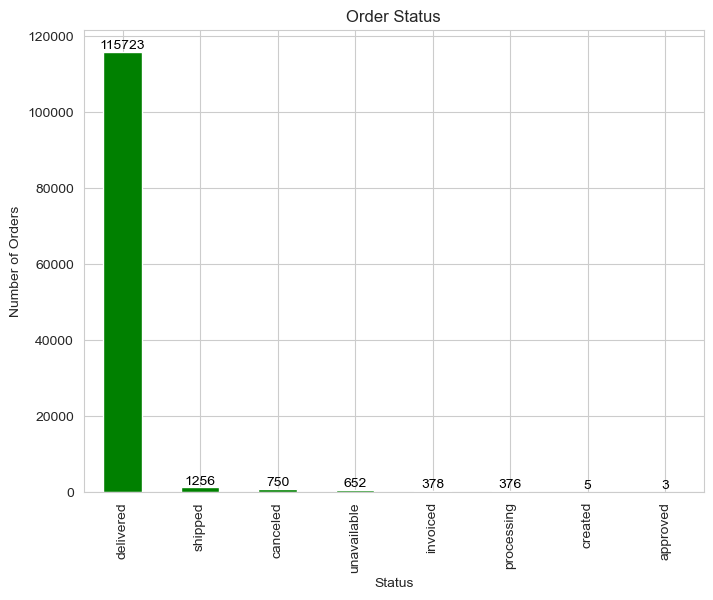

In [169]:
plt.figure(figsize=(8, 6))
ax = all_df['order_status'].value_counts().plot(kind='bar', color='green')

# Menambahkan angka di setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()


### Pertanyaan 6 : Bagaimana pola persebaran geografis customer E-Commerce ini?"

In [170]:
# Mengelompokkan data geolokasi berdasarkan ZIP code dan mendapatkan median lat/lng
geolocation_silver = geolocation_df.groupby(
    ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Menyatukan dengan data customer berdasarkan ZIP code
customers_silver = customers_df.merge(
    geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

# Simpan hasil untuk analisis lebih lanjut
customers_silver.to_csv("geolocation.csv", index=False)

In [177]:
# Ambil data lat-lng pelanggan
heat_data = customers_silver[['geolocation_lat', 'geolocation_lng']].values.tolist()

# Buat peta interaktif
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)  # Pusat Brasil
HeatMap(heat_data, radius=10).add_to(m)

# Tampilkan peta
m

Bisa dilihat pesebaran cukup meluas atau banyak di daerah timur hingga tenggara dari keseluruhan peta amerika selatan, terkhusus untuk brazil berarti pesebaran banyak di daerah selatan hingga tenggara. Dengan penyebaran pusatnya berada di sao paulo

## Conclusion

* Conclution pertanyaan 1: Berdasarkan hasil analisis serta hasil visualisasi, Kategori Produk yang paling banyak dijual atau paling laris ialah bed_bath_table dan juga produk yang paling tidak banyak terjual atau paling sedikit dibeli adalah produk security_and_services

* Conclution pertanyaan 2: Berdasarkan hasil visaliasi jumlah pemesanan per bulan pada tahun 2018 bisa dilihat dari performa grafik dimulai dari bulan Januari hingga Desember,Pada awal tahun, Performa Mengalami penurunan dan penaikan pada januari hingga mei serta mengalami penurunan yang cukup signifikan dari bulan agustus hingga september, namun mengalami peningkatan yang signifikan pada bulan November lalu mengalami penurunan kembali pada bulan desember

* Conclution pertanyaan 3: Berdasarkan hasil visualisasi mengenai kepuasan pelanggan, mayoritas rating yang diberikan pelanggan adalah  5 diikuti pada posisi ke-2, pelanggan memberikan nilai atau rating sebesar 4. Dengan demikian bisa disimpulkan bahwa pelanggan puas terhadap layanan e-commerce